In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

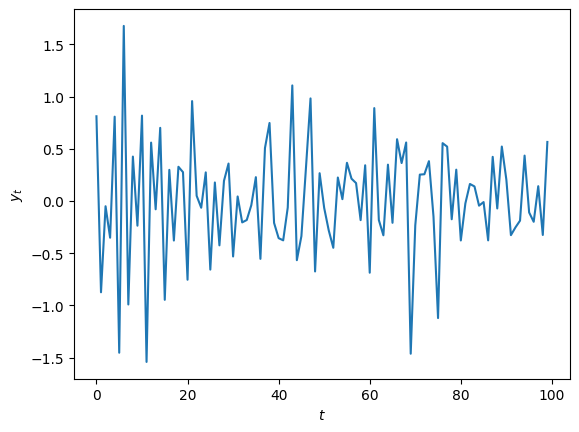

In [5]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

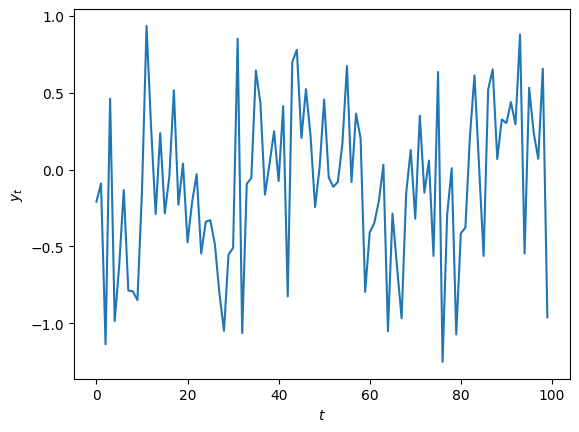

In [6]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

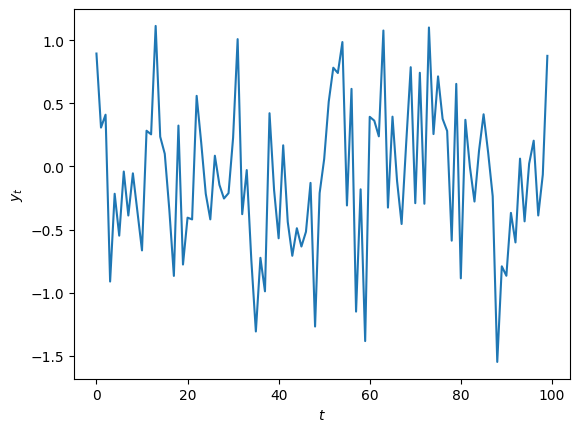

In [7]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [13]:
# Import the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(y, order=(1,0,1))

# Fit the model
results = model.fit()

# Earthquake dataset

In [14]:
earthquake = pd.read_csv('./datasets/earthquakes.csv', 
                    index_col='date',
                    parse_dates=True)

In [19]:
type(earthquake)

pandas.core.frame.DataFrame

In [21]:
earthquake.columns

Index(['Year', 'earthquakes_per_year'], dtype='object')

In [22]:
help(earthquake.drop)

Help on method drop in module pandas.core.frame:

drop(labels: 'IndexLabel' = None, *, axis: 'Axis' = 0, index: 'IndexLabel' = None, columns: 'IndexLabel' = None, level: 'Level' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or '

In [23]:
earthquake = earthquake.drop(columns='Year')
earthquake

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0
...,...
1994-01-01,15.0
1995-01-01,25.0
1996-01-01,22.0


In [24]:
# Instantiate the model
model = ARIMA(earthquake, order=(3,0,1))

# Fit the model
results = model.fit()

# Print model fit summary
print(results.summary())

                                SARIMAX Results                                 
Dep. Variable:     earthquakes_per_year   No. Observations:                   99
Model:                   ARIMA(3, 0, 1)   Log Likelihood                -315.673
Date:                  Tue, 25 Apr 2023   AIC                            643.345
Time:                          16:42:46   BIC                            658.916
Sample:                      01-01-1900   HQIC                           649.645
                           - 01-01-1998                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6453      2.233      8.798      0.000      15.269      24.022
ar.L1          0.5795      0.645      0.899      0.369      -0.684       1.843
ar.L2          0.0251      0.308    

C:\Users\TanQuangDuong\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\TanQuangDuong\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\TanQuangDuong\Anaconda3\envs\pythonic\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
